![title page](img/title.png)

![title](img/examples.png)

<h1> Download and Installation of ASE </h1>

*Website and documentation:*<br>
https://wiki.fysik.dtu.dk/ase/index.html

*Linux/ OS X installation:*<br>
```
pip install--upgrade ase
```

*Manchester CSF3 Installation:*<br>
```
module load tools/env/proxy
module load apps/python3/3.6.4/gcc-4.8.5
module load apps/pip_python36/9.0.1/python3-3.6.4
pip3.6 install --user --upgrade ase
```

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# The Atoms Object

In [46]:
from ase import Atoms

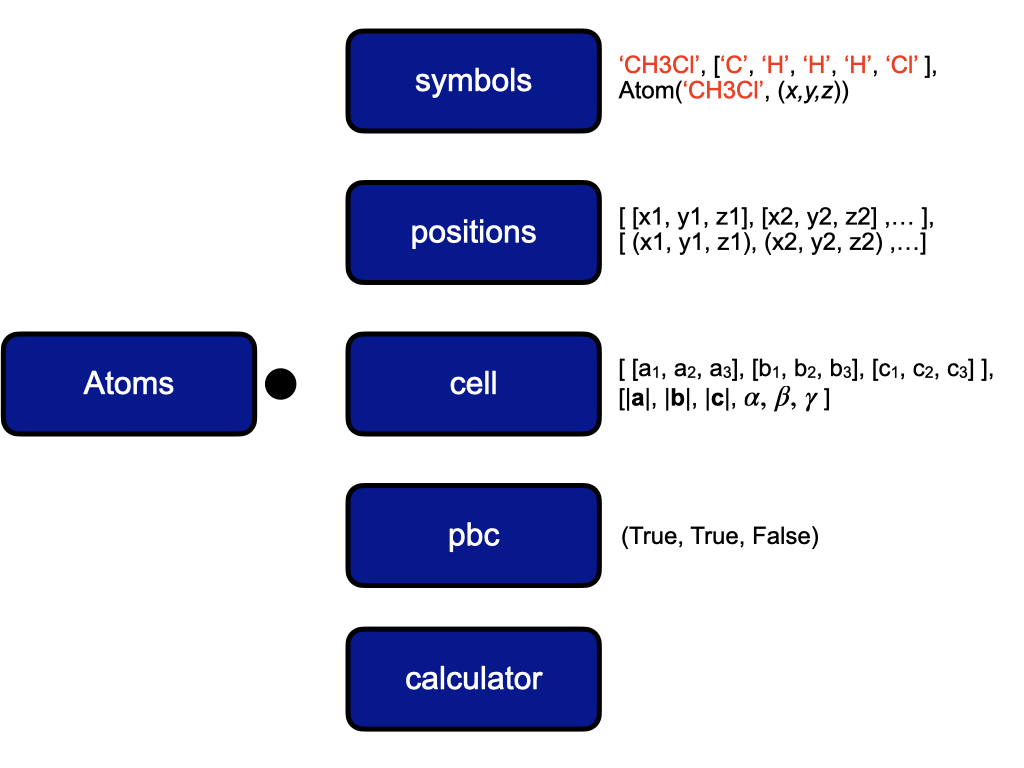

![Supported software calculators](img/supp_calculators.png)

# Setup bulk crystal

Crystal structure based on space group and element basis



![How to build Atoms](img/build_atom.png)

In [4]:
from ase.spacegroup import crystal

<b>Spacegroup reference page</b><br>
<href>https://wiki.fysik.dtu.dk/ase/ase/spacegroup/spacegroup.html<href>

In [5]:
elements = ["Ti", "O", "O"]

basis = [(0.0, 0.0, 0.0), # Ti
         (0.3, 0.3, 0.0)] # O

spaceGroup = 136

a = 4.60
c = 2.95

alpha = 90.
beta = 90.
gamma = 90.

rutileBulk = crystal(
    elements, 
    basis, 
    spacegroup=spaceGroup, 
    cellpar=[a, a, c, alpha, beta, gamma], 
    size=(1,1,1)
)


In [9]:
# What have we created...?
#
#
#
#
#

# Visualise structure

In [47]:
from ase.visualize import view

<b>Visualization reference page</b><br>
<href>https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html</href>

In [12]:
view(rutileBulk, viewer="ngl")


# Preparing a model surface

Cut along one of the crystal places to get a surface

## Out of the box slab generation

In [13]:
from ase.build import surface

<b>Surface reference page<b><br>
    <href>https://wiki.fysik.dtu.dk/ase/ase/build/surface.html</href>

In [14]:
rutile110 = surface(rutileBulk, (1,1,0), 5)
rutile110.center(vacuum=10, axis=2)


In [33]:
view(rutile110, viewer="ngl")

## Tweaking the slab geometry

<p>Due to periodic boundary conditions, it can happen that the generated slab looks a bit strange/ disordered. In our case one of the Ti atoms ends up on the opposite cell boundaries.<br>

<b>This is not an error</b>, but can cause problems later when we try to compute the system geometric centre. Luckily, the periodic boundary conditions also make the <em>fix</em> fairly simple<br>
    
$$A_\alpha(\mathbf{r}+\mathbf{R}) == A_\alpha(\mathbf{r});\; \mathbf{R} = i\mathbf{x} + j\mathbf{y} + k\mathbf{z}$$<br>
    
i.e if we identify the misbehaving Atom in the positions list we can just add/subtract a cell vector, which is a feature of the <code>rutile110</code> object we just created.</p>

In [31]:
# Use this cell to find the problematic Ti atom and unit cell feature
#
#
#
#

In [23]:
# Fixes spurious Ti
rutile110.positions[:,0][0] += rutile110.get_cell()[0,0]


In [26]:
improperGeometricCentre = np.zeros(3)
for i in range(3):
    improperGeometricCentre[i] = np.sum(rutile110.positions[:,i]) - rutile110.positions[-4][i] - rutile110.positions[-3][i]
    
improperGeometricCentre /= (len(rutile110.positions[:,0])-2.)

In [27]:
translation = -1.* improperGeometricCentre
rutile110.translate(translation)

In [29]:
rutile110.positions[:][-4] = rutile110.positions[:][-3]
rutile110.positions[:][-4][2] *= -1.


In [32]:
rutile110.center()
rutile110.positions[:,2] -= np.amin(rutile110.positions[:,2])

In [34]:
bigCell = rutile110.repeat([4, 6, 1])

In [35]:
view(bigCell, viewer="ngl")

# Reading and writing (software specific) files

In [36]:
from ase.io import read, write

![I/O](img/io.png)

In [37]:
write("rutile110_bigCell.gro", bigCell, format="gromacs")

In [38]:
checksolvate = read("rutile110_bigCell_water.gro", format="gromacs")

In [44]:
# What have is checksolvate?
#
#
#
#
#

In [42]:
print(checksolvate.get_chemical_formula())

H508O734Ti240


In [43]:
view(checksolvate, viewer="ngl")

![Comments](img/comments.png)